<span style="font-size: 14pt">MIPT, Applied ML, Autumn 2018</span> 

<span style="font-size: 16pt"> HW#1 </span>

<span style="color:red; font-size: 16pt"> deadline: 22.09.2018 23:59 </span>

<span style="color:blue; font-size: 12pt">Alexey Romanenko </span>,
<span style="color:blue; font-size: 12pt; font-family: 'Verdana'">alexromsput@gmail.com</span>

<h1 align="center">Organization Info</h1> 

**Дополнительный материал для выполнения дз**:
- Лукашин Ю.П. Адаптивные методы краткосрочного прогнозирования временных рядов. Финансы и статистика. 2003, главы 1,4,5,7.
- Магнус Я.Р., Катышев П.К., Пересецкий А.А. Эконометрика. Начальный курс., глава 11

**Оформление дз**: 
- Выполненное задание требуется отправлять через <a href='https://goo.gl/forms/XPSIbwp7wPxB4SsI3'>форму </a>
    - <span style="color:red; font-size: 20pt">ВНИМАНИЕ: для отправки задания потребуется почта в домене gmail.com или phystech.edu</span>
    
- Укажите тему письма в следующем формате ``ML2018_fall_<номер_группы>_<фамилия>``, к примеру -- ``ML2018_fall_594_ivanov``
- Выполненное дз сохраните в файл ``<фамилия>_<группа>_task<номер>.ipynb``, к примеру -- ``ivanov_401_task1.ipynb``

**Вопросы**:
- Вопросы присылайте на почту ml.course.mipt@gmail.com
- Укажите тему письма в следующем формате ``ML2018_fall_Question_<Тема вопроса>``

--------
- **PS1**: Будьте внимательны при заполнении формы, когда отправляете ДЗ 

<h1 align="center">Теоретическая часть (15%)</h1> 

Ответе на вопросы своими словами (загугленный материал надо пересказать), ответ обоснуйте (напишите и ОБЪЯСНИТЕ формулки если потребуется), если не выходит, то вернитесь к лекции дополнительным материалам:


**Вопрос 1**: Пусть дан временной ряд $y_t = \delta\cdot t + \varepsilon_t$, где $\varepsilon_t$ - случайная величина с нулевым матожиданием и не зависящей от времени дисперсией $\sigma$, $E \varepsilon_t \varepsilon_{t+k}=0$ при $k\not=0$, Докажите, что оптимальное значение параметра сглаживания $\alpha$ в алгоритме простого экспоненциального сглаживания для такого временного ряда будет равно 1.



<Ответ>

Простое сглаживание

$ \hat{y_{t+1}} = \alpha y_t + (1 - \alpha)S_{t - 1}$

$MSE = \frac{1}{T - R + 1} \sum_{t  = R}^{T} (y_t - \hat{y_{t}})^2 $

$ (y_t - \hat{y_t})^2 =  (y_t - \alpha y_{t-1} - (1 - \alpha) S_{t - 2})^2 = (((t - \alpha (t - 1))\delta + \varepsilon_t - \alpha \varepsilon_{t - 1} - (1 - \alpha) S_{t - 2})^2 $

$E (y_t - \hat{y_t})^2 =$ (так как все матожидания случайного шума равны 0) $= ((t - \alpha (t - 1))\delta) ^2  + ES_{t - 2 }^2 \geq ((t - \alpha (t - 1))\delta) ^2 \geq ((t - \alpha (t - 1))\delta)^2 \geq \delta^2$ 


Соответственно получаем, что при $\alpha = 1 $ матожидание функции потерь всегда не больше чем при других параметрах.

**Вопрос 2**: Докажите  эквивалетность формул расчёта (в рекуррентной форме и в форме корректировки прогноза (correction error form) )скрытых компонент временного ряда для модели линейного затухающего тренда:

$$ l_{t}= \alpha y_t + \left(1-\alpha\right) \left(l_{t-1} +\phi b_{t-1}\right)\color{red}{=}l_{t-1} +\phi b_{t-1} + \alpha e_t$$,
$$ b_t         = \beta \left(l_t - l_{t-1}\right) + \left(1-\beta\right)\phi b_{t-1}\color{red}{=}\phi b_{t-1} +  \alpha\beta e_t.$$

<Ответ>

$ l_{t}= \alpha y_t + \left(1-\alpha\right) \left(l_{t-1} +\phi b_{t-1}\right) = \alpha y_{t} + l_{t - 1} + \phi b_{t-1} - \alpha l_{t - 1} - \alpha \phi b_{t-1} =l_{t-1} + \phi b_{t-1}+ \alpha (y_{t} - l_{t-1} - \phi b_{t-1})  = l_{t-1} +\phi b_{t-1} + \alpha e_t$

$b_t = \beta (l_t - l_t-1) + (1 - \beta)\phi b_{t-1} = \beta l_t - \beta l_{t-1} + \phi b_t-1 - \beta \phi b_{t-1} = 
\beta(l_{t-1} +\phi b_{t-1} + \alpha e_t) - \beta l_{t-1} + \phi b_t-1 - \beta \phi b_{t-1}  = \phi b_t-1 + \alpha \beta e_t$

**Вопрос 3**: Выведите формулу расчёта скрытых компонент в форме корректировки прогноза (correction error form) временного ряда в модели ЭС с мультипликативным затухающим трендом (WS with multiplicative damped trend):
   
### \begin{align*}
		\hat{y}_{t+d|t} &= l_t b_t^{\left(\phi + \phi^2 + \dots + \phi^{d}\right)}, \\
		l_{t}       &= \alpha y_t + \left(1-\alpha\right) l_{t-1} b_{t-1}^{\phi}, \\
		b_t         &= \beta\frac{l_t}{l_{t-1}} + \left(1-\beta\right)b_{t-1}^{\phi}.
\end{align*}


<Ответ>

$l_{t} = \alpha y_t + \left(1-\alpha\right) l_{t-1} b_{t-1}^{\phi} = \alpha y_t  + (1 - \alpha)\hat{y_{t-1|t}} = \alpha y_t + \hat{y_{t-1|t}} - \alpha \hat{y_{t-1|t}} = \alpha (y_t - \hat{y_{t-1|t}}) + \hat{y_{t-1|t}}  = \hat{y_{t-1|t}} + \alpha e_t = l_{t-1}b_{t-1}^{\phi} + \alpha e_t$

$ b_t = \beta\frac{l_t}{l_{t-1}} + \left(1-\beta\right)b_{t-1}^{\phi} = \beta\frac{\alpha y_t + \left(1-\alpha\right) l_{t-1} b_{t-1}^{\phi}}{l_{t-1}} + \left(1-\beta\right)b_{t-1}^{\phi} = \alpha \beta \frac{y_t}{l_{t-1}} + (1 - \alpha)\beta b_{t-1}^{\phi} + \left(1-\beta\right)b_{t-1}^{\phi} = \alpha \beta \frac{y_t}{l_{t-1}} + \beta b_{t-1}^{\phi} - \alpha \beta b_{t-1}^{\phi}  = \alpha \beta \frac{y_t - \hat{y_{t-1|t}}}{l_{t-1}} + \beta b_{t-1}^{\phi} = \alpha\beta \frac{e_t}{l_{t-1}} + \beta b_{t-1}^{\phi}$

-----------
PS: Если проверяющий не понял ответ на большинство вопросов, то будет пичалька. Пишите так, чтобы можно было разобраться. 

<h1 align="center"> Реализация алгоритма из семейства ES (85%) </h1>

Суть задания: реализовать, применить на данных monthly_wage модель Уинтерса с линейным трендом. 
## $$\hat y_{t+d} = (l_t + b_t d) \cdot s_{t + (d \bmod p) -p}.$$
Результат нужно сравнить с прогнозом модели Тейла-Вейджа.

In [5]:
# start with this code
import pandas as pd
import numpy as np
import utils as u
import math
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from IPython import display
import statsmodels.api as sm
%matplotlib inline

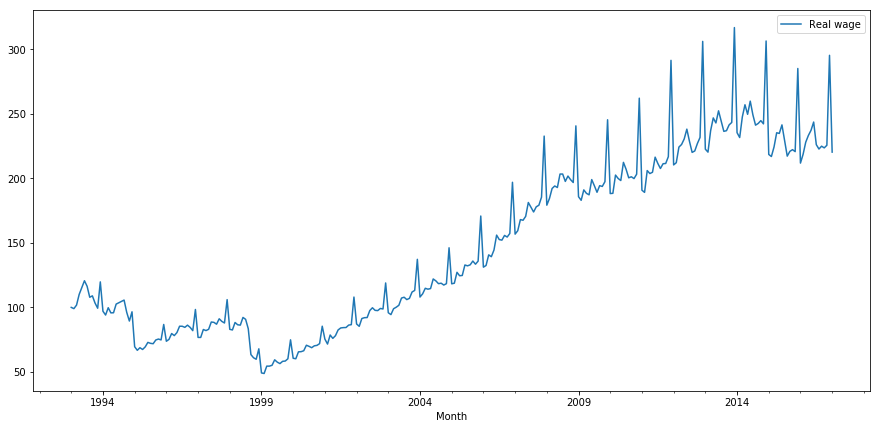

In [4]:
s2 ='https://raw.githubusercontent.com/ml-mipt/ml-mipt-part2/master/2017/seminars/1_ts_esm/data/monthly-wage.csv' 
wage = pd.read_csv(s2, sep=';', decimal='.', index_col= 0, parse_dates=True, dayfirst=True)
wage.plot(figsize=(15,7))
# Put your code below

# 1. Build the Forecast with Theil-Wage Model (25%)

You need to apply Theil-Wage model (see seminar 1) for the TS <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">monthly-wage.csv</span>.

Forecast delay $h=1$ for all point in this task.


* 0) Forecast Wage TS with Theil-Wage $\alpha=.1, \beta=0.3, \gamma=0.3$.
* 1) Find the best param $\alpha, \beta, \gamma$ of Theil-Wage for data period from 09.1998 to 01.2015. 
* 2) Draw the forecast that correspond to IES with optimial value $\alpha$ (use time steps from 09.1998 to 01.2017.)
     Conclude whether IES can be used for this TS? If can not than explain why.
* 3) Calculate loss of the forecast of TS in [02.2015, 01.2017]. (You can choose any Loss function from seminar 1).

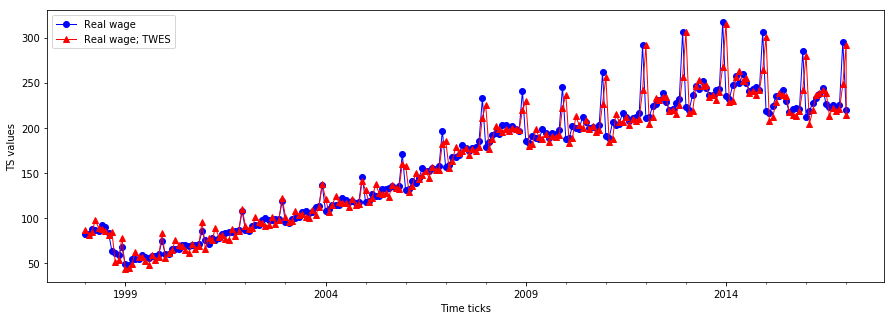

In [30]:
twes_params = {'beta':0.3, 'gamma':0.3, 'alpha':1.0, 'AdaptationPeriod':10, 'seasonality_period':12}
TWES_FRC_TS = u.build_forecast(h=1, ts=wage, algname = 'TWExponentialSmoothing', algtitle='TWES', 
                             params_array=[twes_params])
algName = "TWES {'beta': 0.3, 'gamma': 0.3, 'alpha': 1.0, 'AdaptationPeriod': 10, 'seasonality_period': 12}"
u.plot_tsforecast(wage.loc['1998-01':'2017-01'], TWES_FRC_TS[algName].loc['1998-01':'2017-01'],
                ts_num=0, alg_title='TWES')

## 1) Search for the optimal $\alpha$, $\beta$, $\gamma$ (10%)

In [137]:
ALPHA = np.arange(0.35, 0.46, 0.01)
BETA = np.arange(0.05, 0.16, 0.01)
GAMMA = np.arange(0.65, 0.76, 0.01)
twes_params_array = [{'beta':beta,
                      'gamma':gamma,
                      'alpha':alpha,
                      'AdaptationPeriod':10,
                      'seasonality_period':12} for gamma in GAMMA for beta in BETA for alpha in ALPHA]
TWES_FRC_TS = u.build_forecast(h=1, 
                               ts=wage,
                               algname = 'TWExponentialSmoothing',
                               algtitle='TWES',
                               params_array=twes_params_array)

In [138]:
# find best TWES parameters
QualityStr = pd.DataFrame(index = wage.columns, columns = TWES_FRC_TS.keys())

ix = wage.index
for param_cntr in sorted(QualityStr.columns):
    frc_wage = TWES_FRC_TS[param_cntr]
    QualityStr[param_cntr],_ = u.qualityMACAPE(wage.loc['1998-01':'2015-01'], frc_wage.loc['1998-01':'2015-01'])
    
QualityStr[QualityStr.columns].mean().sort_values()


TWES {'beta': 0.05, 'gamma': 0.7500000000000001, 'alpha': 0.4600000000000001, 'AdaptationPeriod': 10, 'seasonality_period': 12}                     0.026726
TWES {'beta': 0.060000000000000005, 'gamma': 0.7500000000000001, 'alpha': 0.44000000000000006, 'AdaptationPeriod': 10, 'seasonality_period': 12}    0.026753
TWES {'beta': 0.05, 'gamma': 0.7500000000000001, 'alpha': 0.45000000000000007, 'AdaptationPeriod': 10, 'seasonality_period': 12}                    0.026754
TWES {'beta': 0.060000000000000005, 'gamma': 0.7500000000000001, 'alpha': 0.4600000000000001, 'AdaptationPeriod': 10, 'seasonality_period': 12}     0.026756
TWES {'beta': 0.060000000000000005, 'gamma': 0.7500000000000001, 'alpha': 0.45000000000000007, 'AdaptationPeriod': 10, 'seasonality_period': 12}    0.026759
TWES {'beta': 0.05, 'gamma': 0.7400000000000001, 'alpha': 0.4600000000000001, 'AdaptationPeriod': 10, 'seasonality_period': 12}                     0.026766
TWES {'beta': 0.060000000000000005, 'gamma': 0.74000000000

## 2) draw the forecast with optimial value $\alpha $  (10%)

In [139]:
algNameTWES = QualityStr[QualityStr.columns].mean().sort_values().index[0]
print(algNameTWES)

TWES {'beta': 0.05, 'gamma': 0.7500000000000001, 'alpha': 0.4600000000000001, 'AdaptationPeriod': 10, 'seasonality_period': 12}


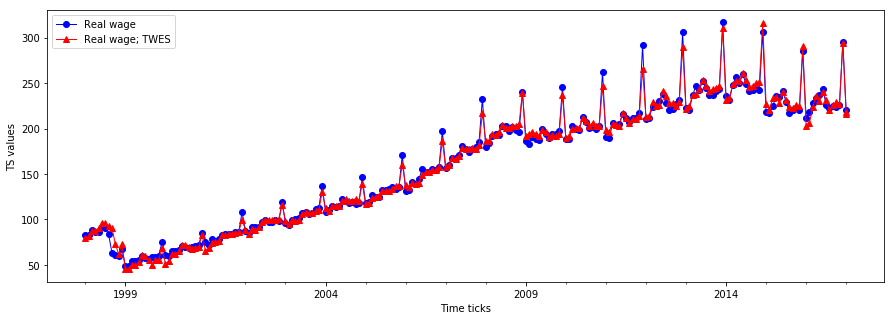

In [140]:
u.plot_tsforecast(wage.loc['1998-01':'2017-01'], 
                TWES_FRC_TS[algNameTWES].loc['1998-01':'2017-01'], 
                ts_num=0,
                alg_title='TWES')

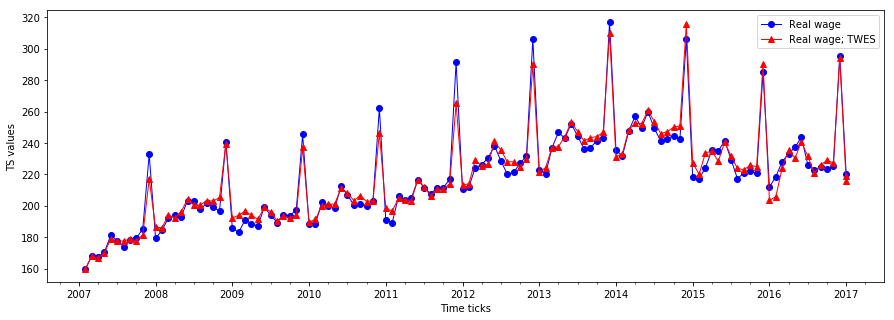

In [141]:
u.plot_tsforecast(wage.loc['2007-02':'2017-01'], 
                TWES_FRC_TS[algNameTWES].loc['2007-02':'2017-01'], 
                ts_num=0,
                alg_title='TWES')

## 3) Calculate loss of the forecast of TS in [02.2015, 01.2017] (5%)

In [142]:
# example of code:
u.qualityMACAPE(wage.loc['2015-02':'2017-01'], TWES_FRC_TS[algNameTWES].loc['2015-02':'2017-01'])[0]

Real wage    0.018962
dtype: float64

# 2. Non-additive model of ES (60%)
You need to realize Winters model with linear trend and then use it for forecasting real TS <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">monthly-wage.csv</span>.

Forecast delay $h=1$ for all point in this task.


## 1) Realize Winters Model with Linear trend (20%)

In [127]:
def WintersLinearTrendExponentialSmoothing(x, h, Params):
    T = len(x)
    alpha = Params['alpha']
    beta = Params['beta']
    gamma = Params['gamma']
    p = Params['seasonality_period']
    
    FORECAST = [np.NaN] * (T+h)
    
    l = np.NaN
    b = np.NaN
    s = []
    average = np.mean(x[:p])
    for i in range(p):
        if not math.isnan(x[i]):
            s.append(x[i] / average)
        else:
            s.append(s[i-1])

    for cntr in range(T):
        if not math.isnan(x[cntr]):
            if math.isnan(l):
                l = x[cntr]
            if math.isnan(b):
                b = 0
            if cntr < p:
                l_old = l
                l = alpha * ( x[cntr] / s[cntr] ) + ( 1 - alpha ) * ( l + b )
                b = beta * ( l - l_old ) + ( 1 - beta ) * b
            else:
                l_old = l
                s_old = s[cntr % p]
                l = alpha * (x[cntr] / s_old) + (1-alpha)*(l+b) # recurrent smoothing of level
                b=beta*(l-l_old)+(1-beta)*b
                s[cntr%p]=gamma*(x[cntr]/l)+(1-gamma)*s[cntr%p]
            
        FORECAST[cntr + h] = ( l + b ) * s[( cntr + h ) % p]
    return FORECAST

Для целостности внесем новую функцию в utils.

In [128]:
import importlib
importlib.reload(u)

<module 'utils' from 'C:\\Users\\rodin\\Documents\\repos\\ml-mipt-part2\\2018\\hw\\utils.py'>

## 2) Find optimal params of the model (10%)
(use data from 09.1998 to 01.2015). (Loss function should be the same as for Theil-Wage model)

In [143]:
ALPHA = np.arange(0.45, 0.56, 0.01)
BETA = np.arange(0.05, 0.16, 0.01)
GAMMA = np.arange(0.85, 0.99, 0.01)
wltes_params_array = [{'beta':beta,
                      'gamma':gamma,
                      'alpha':alpha,
                      'AdaptationPeriod':10,
                      'seasonality_period':12} for gamma in GAMMA for beta in BETA for alpha in ALPHA]
WLTES_FRC_TS = u.build_forecast(h=1, 
                               ts=wage,
                               algname = 'WintersLinearTrendExponentialSmoothing',
                               algtitle = 'WLTES',
                               params_array = twes_params_array)

In [144]:
QualityStr = pd.DataFrame(index = wage.columns, columns = WLTES_FRC_TS.keys())

ix = wage.index
for param_cntr in sorted(QualityStr.columns):
    frc_wage = WLTES_FRC_TS[param_cntr]
    QualityStr[param_cntr],_ = u.qualityMACAPE(wage.loc['1998-09':'2015-01'], frc_wage.loc['1998-01':'2015-01'])
    
QualityStr[QualityStr.columns].mean().sort_values()

WLTES {'beta': 0.1, 'gamma': 0.7500000000000001, 'alpha': 0.4600000000000001, 'AdaptationPeriod': 10, 'seasonality_period': 12}                     0.022803
WLTES {'beta': 0.11000000000000001, 'gamma': 0.7500000000000001, 'alpha': 0.4600000000000001, 'AdaptationPeriod': 10, 'seasonality_period': 12}     0.022819
WLTES {'beta': 0.12000000000000001, 'gamma': 0.7500000000000001, 'alpha': 0.4600000000000001, 'AdaptationPeriod': 10, 'seasonality_period': 12}     0.022867
WLTES {'beta': 0.09000000000000001, 'gamma': 0.7500000000000001, 'alpha': 0.4600000000000001, 'AdaptationPeriod': 10, 'seasonality_period': 12}     0.022867
WLTES {'beta': 0.1, 'gamma': 0.7400000000000001, 'alpha': 0.4600000000000001, 'AdaptationPeriod': 10, 'seasonality_period': 12}                     0.022868
WLTES {'beta': 0.11000000000000001, 'gamma': 0.7400000000000001, 'alpha': 0.4600000000000001, 'AdaptationPeriod': 10, 'seasonality_period': 12}     0.022891
WLTES {'beta': 0.11000000000000001, 'gamma': 0.75000000000

## 3) Draw forecast with optimal values of it's params (10%)
(data from 09.1998 to 01.2017)

In [145]:
algNameWLTES = QualityStr[QualityStr.columns].mean().sort_values().index[0]
print(algNameWLTES)

WLTES {'beta': 0.1, 'gamma': 0.7500000000000001, 'alpha': 0.4600000000000001, 'AdaptationPeriod': 10, 'seasonality_period': 12}


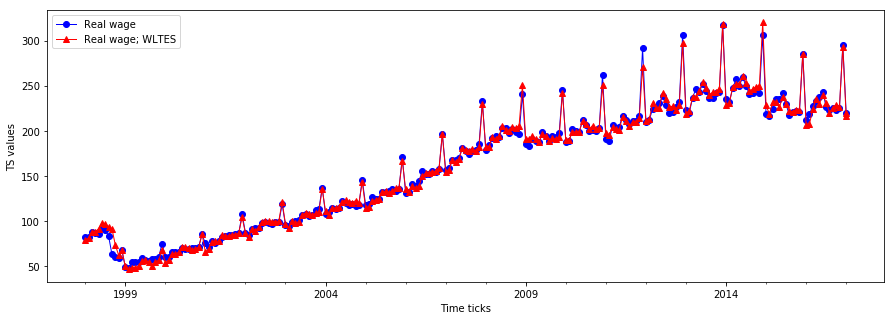

In [146]:
u.plot_tsforecast(wage.loc['1998-01':'2017-01'], 
                WLTES_FRC_TS[algNameWLTES].loc['1998-01':'2017-01'], 
                ts_num=0,
                alg_title='WLTES')

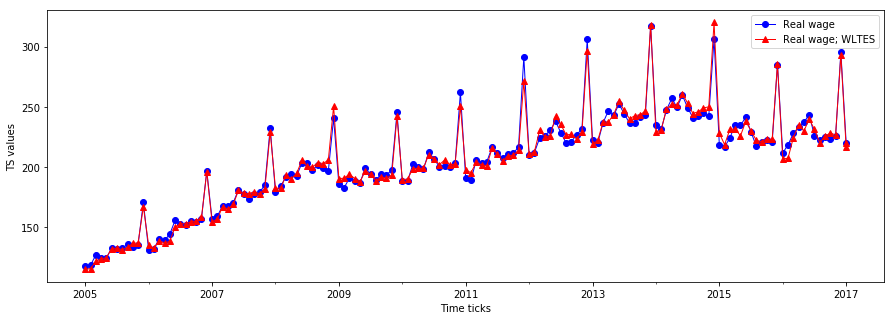

In [147]:
u.plot_tsforecast(wage.loc['2005-01':'2017-01'], 
                WLTES_FRC_TS[algNameWLTES].loc['2005-01':'2017-01'], 
                ts_num=0,
                alg_title='WLTES')

## 4) Calculate accuracy of the forecast of TS in [02.2015, 01.2017] (10%)
(Loss function should be the same as for Theil-Wage model). 

In [148]:
u.qualityMACAPE(wage.loc['2015-02':'2017-01'], WLTES_FRC_TS[algNameWLTES].loc['2015-02':'2017-01'])[0]

Real wage    0.016124
dtype: float64

## 5) Compare Winters Model with linear thend and Theil-Wage model (10%) 
Which forecast is better (more accurate)?
Is it true that multiplicative model is more appropriate then Theil-Wage Model to this time series?
Hint: you should use for example Diebold-Mariano test (see here https://github.com/johntwk/Diebold-Mariano-Test) to make a conclusion.

In [153]:
from dm_test import dm_test 

rt = dm_test(wage.loc['1998-09':'2017-01'].values.flatten(), 
WLTES_FRC_TS[algNameWLTES].loc['1998-10':'2017-01'].values.flatten(), 
TWES_FRC_TS[algNameTWES].loc['1998-10':'2017-01'].values.flatten(),h = 1, crit="MAD") 
print(rt) 
rt = dm_test(wage.loc['1998-09':'2017-01'].values.flatten(), 
WLTES_FRC_TS[algNameWLTES].loc['1998-10':'2017-01'].values.flatten(), 
TWES_FRC_TS[algNameTWES].loc['1998-10':'2017-01'].values.flatten(), h = 1, crit="MSE") 
print(rt) 

dm_return(DM=2.687822065823617, p_value=0.007741967940028045)
dm_return(DM=3.136827669120384, p_value=0.00194130756278192)


По результатам теста получаем, что гипотезу о том что методы совпадают надо отвергнуть. Соответственно, так как перекос в положительную сторону, то лучшая модель это Winters Linear Trend Exponential Smoothing.